<a href="https://colab.research.google.com/github/Reddydhanush23/CSA4705-Deep-Learning/blob/main/Program%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

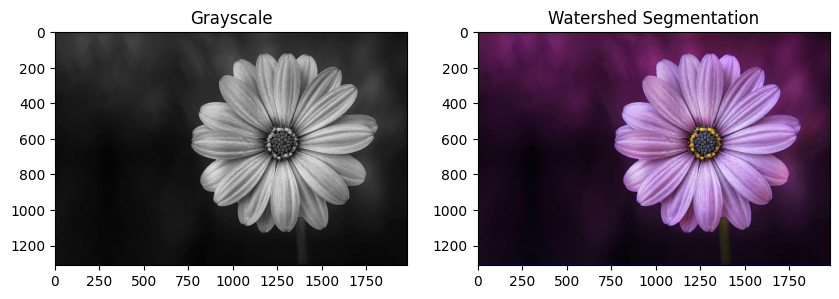

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/deeplearning 6th.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)), plt.title('Grayscale')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Watershed Segmentation')
plt.show()
